In [21]:
#Iris dataset for a simple softmax regression example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
X, y = load_iris(return_X_y=True)
X = X[:, [0, 2]]   # sepal length, petal length

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias
X = np.hstack([np.ones((X.shape[0], 1)), X])
df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


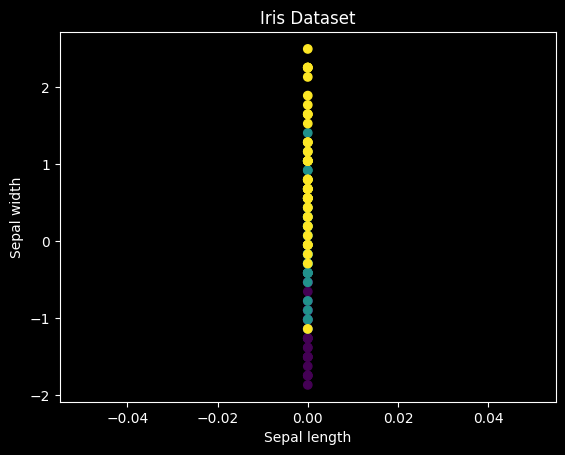

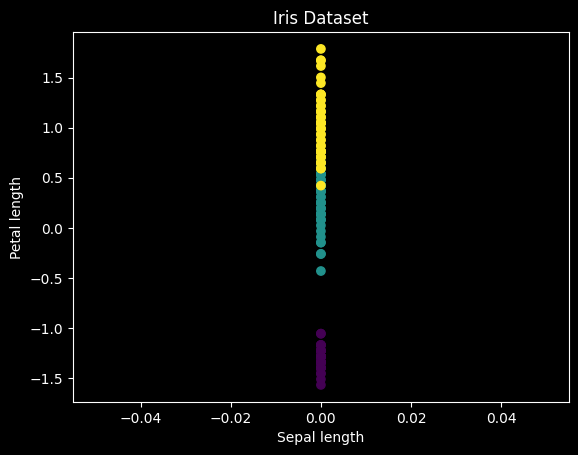

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset')
plt.show()


plt.scatter(X[:, 0], X[:, 2], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Iris Dataset')
plt.show()


In [31]:
#Softmax function 
def softmax(Z):
    Z = Z - np.max(Z, axis=1, keepdims=True)
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

In [32]:
def one_hot(y, num_classes):
    Y = np.zeros((y.size, num_classes))
    Y[np.arange(y.size), y] = 1
    return Y

In [33]:
def cross_entropy(Y_true, Y_pred):
    eps = 1e-15
    Y_pred = np.clip(Y_pred, eps, 1 - eps)
    return -np.mean(np.sum(Y_true * np.log(Y_pred), axis=1))


In [34]:
def train_softmax(X, y, lr=0.1, epochs=1000):
    m, d = X.shape
    K = len(np.unique(y))
    
    W = np.zeros((d, K))
    Y = one_hot(y, K)

    for epoch in range(epochs):
        scores = X @ W
        probs = softmax(scores)

        loss = cross_entropy(Y, probs)

        grad = (1 / m) * X.T @ (probs - Y)
        W -= lr * grad

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return W


In [35]:
def predict(X, W):
    probs = softmax(X @ W)
    return np.argmax(probs, axis=1)


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

W = train_softmax(X, y, lr=0.1, epochs=1000)

y_pred = predict(X, W)
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)

Epoch 0, Loss: 1.0986
Epoch 100, Loss: 0.5343
Epoch 200, Loss: 0.5077
Epoch 300, Loss: 0.4940
Epoch 400, Loss: 0.4844
Epoch 500, Loss: 0.4770
Epoch 600, Loss: 0.4712
Epoch 700, Loss: 0.4664
Epoch 800, Loss: 0.4624
Epoch 900, Loss: 0.4590
Accuracy: 0.7066666666666667


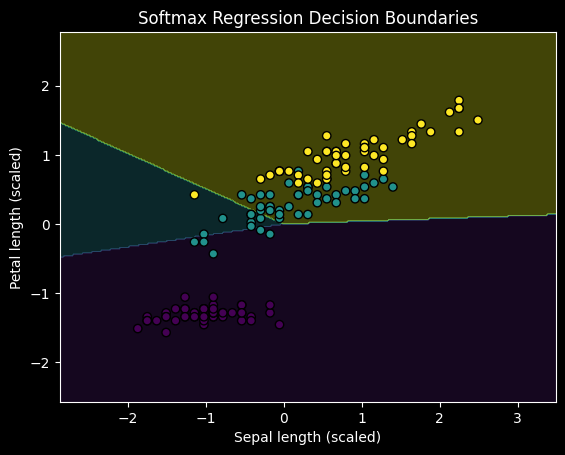

In [37]:
def plot_softmax_decision_boundary(X, y, W):
    h = 0.02

    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    preds = np.argmax(softmax(grid @ W), axis=1)
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3)
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolor='k')
    plt.xlabel("Sepal length (scaled)")
    plt.ylabel("Petal length (scaled)")
    plt.title("Softmax Regression Decision Boundaries")
    plt.show()
plot_softmax_decision_boundary(X, y, W)